In [1]:
import numpy
import pandas

In [2]:
train_dataframe = pandas.read_csv("./train.csv")
test_dataframe = pandas.read_csv("./test.csv")

In [3]:
train_dataframe.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
test_dataframe.head()

,age,gender,bmi,children,smoker,region,charges
0,30,male,22.99,2,yes,northwest,17361.76610
1,24,male,32.70,0,yes,southwest,34472.84100
2,24,male,25.80,0,no,southwest,1972.95000
3,48,male,29.60,0,no,southwest,21232.18226
4,47,male,19.19,1,no,northeast,8627.54110


In [5]:
train_dataframe.dtypes

age           int64
gender       object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
train_dataframe["gender"].value_counts()

male      505
female    495
Name: gender, dtype: int64

In [7]:
cleanup_nums = {"gender":{"male": 1, "female": 0}}

In [8]:
train_dataframe.replace(cleanup_nums, inplace=True)
test_dataframe.replace(cleanup_nums, inplace=True)
train_dataframe.head()

,age,gender,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [9]:
test_dataframe.head()

,age,gender,bmi,children,smoker,region,charges
0,30,1,22.99,2,yes,northwest,17361.76610
1,24,1,32.70,0,yes,southwest,34472.84100
2,24,1,25.80,0,no,southwest,1972.95000
3,48,1,29.60,0,no,southwest,21232.18226
4,47,1,19.19,1,no,northeast,8627.54110


In [10]:
train_dataframe["gender"].value_counts()

1    505
0    495
Name: gender, dtype: int64

In [11]:
cleanup_nums = {"smoker":{"yes": 1, "no": 0}}

In [12]:
train_dataframe.replace(cleanup_nums, inplace=True)
test_dataframe.replace(cleanup_nums, inplace=True)
train_dataframe.head()

,age,gender,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [13]:
train_dataframe["region"].value_counts()

southeast    278
northeast    247
southwest    244
northwest    231
Name: region, dtype: int64

In [14]:
train_dataframe = pandas.get_dummies(train_dataframe,columns=['region'] )
test_dataframe = pandas.get_dummies(test_dataframe,columns=['region'] )

In [15]:
test_dataframe.head()

,age,gender,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,30,1,22.99,2,1,17361.76610,0,1,0,0
1,24,1,32.70,0,1,34472.84100,0,0,0,1
2,24,1,25.80,0,0,1972.95000,0,0,0,1
3,48,1,29.60,0,0,21232.18226,0,0,0,1
4,47,1,19.19,1,0,8627.54110,1,0,0,0


## regression without regularization

In [16]:
train_dataframe.describe()

,age,gender,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,39.615000,0.505000,30.86338,1.080000,0.196000,13075.755883,0.247000,0.231000,0.278000,0.244000
std,14.153908,0.500225,6.04744,1.198765,0.397167,11985.924552,0.431483,0.421683,0.448238,0.429708
min,18.000000,0.000000,15.96000,0.000000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.60000,0.000000,0.000000,4719.683425,0.000000,0.000000,0.000000,0.000000
50%,40.000000,1.000000,30.59000,1.000000,0.000000,9283.021300,0.000000,0.000000,0.000000,0.000000
75%,52.000000,1.000000,35.11250,2.000000,0.000000,15882.795437,0.000000,0.000000,1.000000,0.000000
max,64.000000,1.000000,50.38000,5.000000,1.000000,63770.428010,1.000000,1.000000,1.000000,1.000000


In [17]:
train_dataframe['age'] = train_dataframe['age'].apply(lambda x: x ** 2)
test_dataframe['age'] = test_dataframe['age'].apply(lambda x: x ** 2)
train_dataframe.head()

,age,gender,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,361,0,27.900,0,1,16884.92400,0,0,0,1
1,324,1,33.770,1,0,1725.55230,0,0,1,0
2,784,1,33.000,3,0,4449.46200,0,0,1,0
3,1089,1,22.705,0,0,21984.47061,0,1,0,0
4,1024,1,28.880,0,0,3866.85520,0,1,0,0


In [18]:
X_train = train_dataframe.loc[:, train_dataframe.columns != 'charges'].values
Y_train = train_dataframe[['charges']].values
X_test = test_dataframe.loc[:, test_dataframe.columns != 'charges'].values
Y_test = test_dataframe[['charges']].values

In [19]:
def cal_w(X,Y):
    W = numpy.matmul(numpy.matmul(numpy.linalg.inv(numpy.matmul(numpy.transpose(X), X)), numpy.transpose(X)), Y)
    return W

In [20]:
W = cal_w(X_train,Y_train)

In [21]:
W

array([[ 3.30752409e+00],
       [-2.83185963e+02],
       [ 3.37031996e+02],
       [ 5.53892111e+02],
       [ 2.38823566e+04],
       [-7.52569883e+03],
       [-7.99692026e+03],
       [-8.83897937e+03],
       [-8.81785138e+03]])

## part B

In [28]:
def cal_MSE(Y, Yhat):
    return numpy.asscalar(numpy.matmul(numpy.transpose(Y - Yhat), (Y - Yhat)))/Y.shape[0]

In [74]:
sizes = []
train_errors = []
test_errors = []
for size in range(20, 1000, 10):
    W = cal_w(X_train[:size],Y_train[:size])
    Yhat_train = numpy.matmul(X_train[:size], W)
    Yhat_test = numpy.matmul(X_test, W)
    sizes.append(size)
    train_errors.append(cal_MSE(Y_train[:size], Yhat_train))
    test_errors.append(cal_MSE(Y_test, Yhat_test))
    #print(cal_MSE(Y_train[:size], Yhat_train))
    #print(cal_MSE(Y_test, Yhat_test))

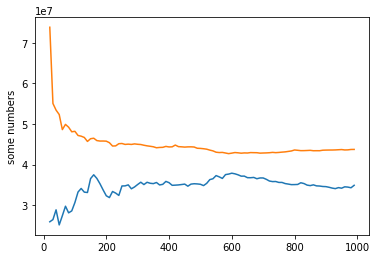

In [75]:
import matplotlib.pyplot as plt
plt.plot(sizes, train_errors)
plt.plot(sizes, test_errors)
plt.ylabel('some numbers')
plt.show()

## Batch Gradient Decent